# File 2 - EDA

## Data Description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data_20230424-1.csv')

In [3]:
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)
df.head()

,Taxi_trips,Rideshare_trips,Arr Pax,Temp (°C),Rel Hum (%),Wind Spd (km/h),Freezing Drizzle,Rain,Smoke,Heavy Rain,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1_excel,lag2_excel,lag3_excel
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,140,NaN,3.0,2.0,80.0,8.0,0,0,0,0,...,1,1,1,2019,1,1,1,43102.000000,42738.000000,42374.000000
2019-01-01 00:00:00,140,NaN,221.0,2.0,80.0,8.0,0,0,0,0,...,1,1,1,2019,1,1,1,43102.000000,42738.000000,42374.000000
2019-01-01 01:00:00,82,NaN,3.0,1.6,82.0,14.0,0,0,0,0,...,1,1,1,2019,1,1,1,43102.041667,42738.041667,42374.041667
2019-01-01 02:00:00,34,NaN,NaN,1.9,79.0,10.0,0,0,0,0,...,1,1,1,2019,1,1,1,43102.083333,42738.083333,42374.083333
2019-01-01 03:00:00,10,NaN,NaN,1.9,82.0,9.0,0,0,0,0,...,1,1,1,2019,1,1,1,43102.125000,42738.125000,42374.125000


In [4]:
df.tail()

,Taxi_trips,Rideshare_trips,Arr Pax,Temp (°C),Rel Hum (%),Wind Spd (km/h),Freezing Drizzle,Rain,Smoke,Heavy Rain,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1_excel,lag2_excel,lag3_excel
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-31 22:00:00,112,75.0,454.0,0.2,100.0,7.0,0,0,0,0,...,1,1,1,2023,31,31,5,44593.916667,44229.916667,43865.916667
2023-01-31 22:00:00,112,75.0,789.0,0.2,100.0,7.0,0,0,0,0,...,1,1,1,2023,31,31,5,44593.916667,44229.916667,43865.916667
2023-01-31 23:00:00,83,64.0,66.0,0.2,100.0,7.0,0,0,0,0,...,1,1,1,2023,31,31,5,44593.958333,44229.958333,43865.958333
2023-01-31 23:00:00,83,64.0,294.0,0.2,100.0,7.0,0,0,0,0,...,1,1,1,2023,31,31,5,44593.958333,44229.958333,43865.958333
2023-01-31 23:00:00,83,64.0,336.0,0.2,100.0,7.0,0,0,0,0,...,1,1,1,2023,31,31,5,44593.958333,44229.958333,43865.958333


In [5]:
df.shape

(75116, 50)

In [6]:
df.columns

Index(['Taxi_trips', 'Rideshare_trips', 'Arr Pax', 'Temp (°C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Freezing Drizzle', 'Rain', 'Smoke', 'Heavy Rain',
       'Haze', 'Moderate Snow', 'Thunderstorms', 'Snow', 'Ice Pellets',
       'Moderate Rain', 'Heavy Snow', 'Mainly Clear', 'Ice Pellet Showers',
       'Rain Showers', 'Drizzle', 'Clear', 'Freezing Rain', 'Blowing Snow',
       'Hail', 'Fog', 'Moderate Rain Showers', 'Freezing Fog', 'Mostly Cloudy',
       'Cloudy', 'Moderate Ice Pellets', 'Snow Showers', 'Africa',
       'Asia Pacific', 'Domestic', 'Europe', 'Latin America', 'Middle East',
       'Transborder', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear', 'lag1_excel', 'lag2_excel',
       'lag3_excel'],
      dtype='object')

'cleaned_data' contains `Taxi_trips`, `Rideshare_trips`, and `Arr Pax` from 2019-01-01 to 2023-01-31. It has 75,116 rows and 48 columns. Most of the columns are dummy variables of detailed weather conditions and regions, and time series features such as `hour`, `dayofweek`, `quarter`, etc.

## Summary Stats
Since most of the columns are dummy variables, they only have 0 and 1 values. `Arr Pax` varies the most, from 0 to 2453.

In [7]:
df.describe()

,Taxi_trips,Rideshare_trips,Arr Pax,Temp (°C),Rel Hum (%),Wind Spd (km/h),Freezing Drizzle,Rain,Smoke,Heavy Rain,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1_excel,lag2_excel,lag3_excel
count,75116.000000,36776.000000,70982.000000,75097.000000,75091.000000,75092.000000,75116.000000,75116.000000,75116.000000,75116.000000,...,75116.000000,75116.000000,75116.000000,75116.000000,75116.000000,75116.000000,75116.000000,75116.000000,75116.000000,75116.000000
mean,85.250040,48.599032,401.314981,10.530778,80.054294,13.903678,0.000107,0.120014,0.005445,0.000293,...,3.016148,2.469021,6.386456,2020.532430,178.963031,15.736195,26.034866,43840.350310,43476.350310,43112.350310
std,77.134521,35.124978,341.581483,6.733241,14.542633,7.783045,0.010319,0.324981,0.073589,0.017111,...,2.003078,1.158025,3.617961,1.264079,110.576995,8.842806,15.767574,472.728216,472.728216,472.728216
min,1.000000,1.000000,0.000000,-14.200000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,1.000000,43102.000000,42738.000000,42374.000000
25%,22.000000,20.000000,142.000000,5.700000,70.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,2019.000000,77.000000,8.000000,12.000000,43399.906250,43035.906250,42671.906250
50%,64.000000,42.000000,298.000000,9.700000,82.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,6.000000,2020.000000,180.000000,16.000000,26.000000,43831.708333,43467.708333,43103.708333
75%,126.000000,72.000000,577.000000,15.800000,92.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,4.000000,10.000000,2022.000000,277.000000,23.000000,40.000000,44286.177083,43922.177083,43558.177083
max,432.000000,221.000000,2453.000000,32.100000,100.000000,67.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,4.000000,12.000000,2023.000000,366.000000,31.000000,53.000000,44593.958333,44229.958333,43865.958333


## Data Visualization

### Overall Taxi Trips

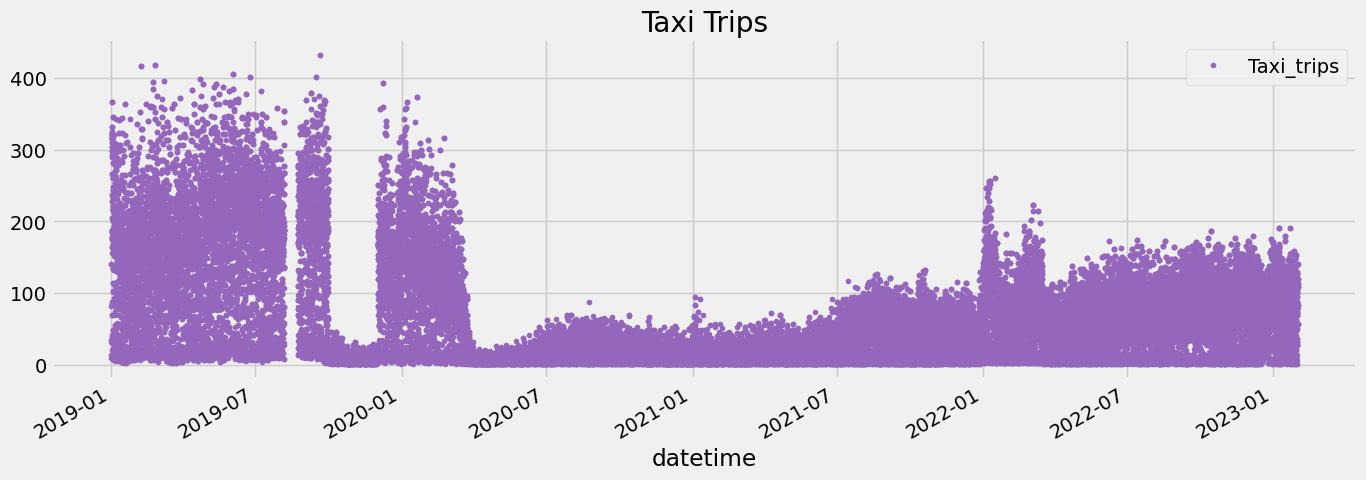

In [8]:
df.plot(y='Taxi_trips',
        style='.',
        figsize=(15, 5),
        color=color_pal[4],
        title='Taxi Trips')
plt.show()

There was a dramatic drop in the middle of 2019 because of the rideshare services. And you can see a little empty gap in August 2019. That's because we don't have data from August 7th to 22nd, 2019. There was a massive drop in late March 2020 because of Covid-19. After that, you can see that it is contantly growing.

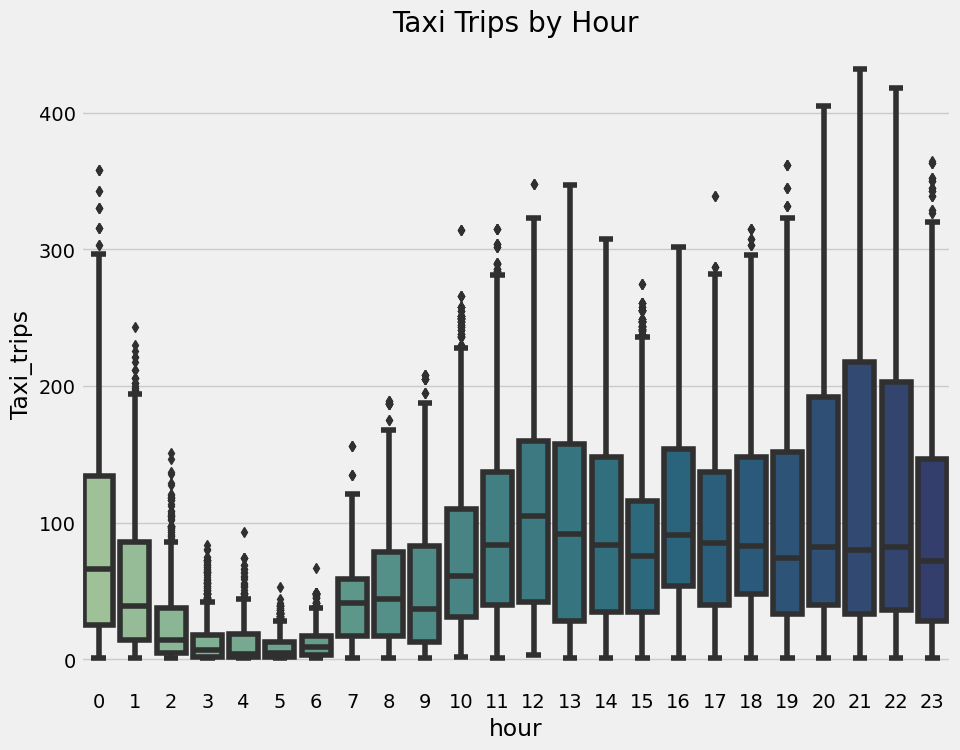

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='Taxi_trips', palette='crest')
ax.set_title('Taxi Trips by Hour')
plt.show()

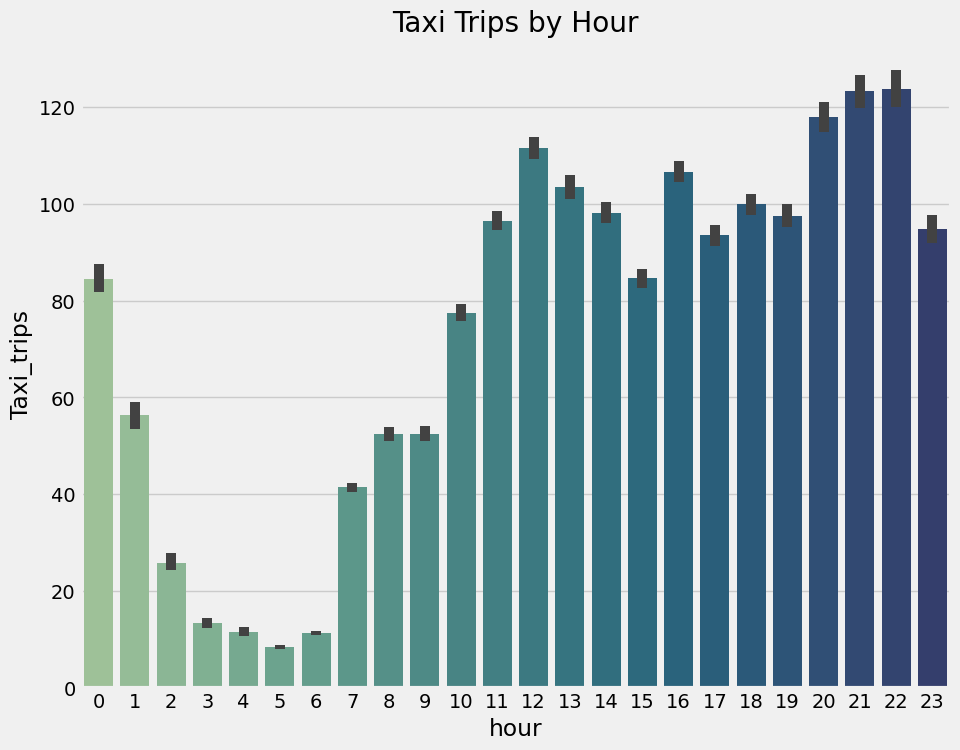

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df, x='hour', y='Taxi_trips', palette='crest')
ax.set_title('Taxi Trips by Hour')
plt.show()

We can see that the demand is the highest at night around 9-10pm and lowest in the morning around 5am.

### Monthly Data
Since our data is from 2019-01-01 to 2023-01-31, we have 5 years of data for only January and 5 years of other months. So for here, let's drop 2019 January data and see how it looks like.

In [11]:
df_temp = df[df.index >= '2019-02-01']
df_temp.head()

,Taxi_trips,Rideshare_trips,Arr Pax,Temp (°C),Rel Hum (%),Wind Spd (km/h),Freezing Drizzle,Rain,Smoke,Heavy Rain,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1_excel,lag2_excel,lag3_excel
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,273,NaN,179.0,7.2,89.0,10.0,0,1,0,0,...,4,1,2,2019,32,1,5,43133.000000,42769.000000,42405.000000
2019-02-01 00:00:00,273,NaN,505.0,7.2,89.0,10.0,0,1,0,0,...,4,1,2,2019,32,1,5,43133.000000,42769.000000,42405.000000
2019-02-01 01:00:00,202,NaN,3.0,7.1,90.0,14.0,0,1,0,0,...,4,1,2,2019,32,1,5,43133.041667,42769.041667,42405.041667
2019-02-01 01:00:00,202,NaN,138.0,7.1,90.0,14.0,0,1,0,0,...,4,1,2,2019,32,1,5,43133.041667,42769.041667,42405.041667
2019-02-01 02:00:00,69,NaN,139.0,6.8,94.0,16.0,0,1,0,0,...,4,1,2,2019,32,1,5,43133.083333,42769.083333,42405.083333


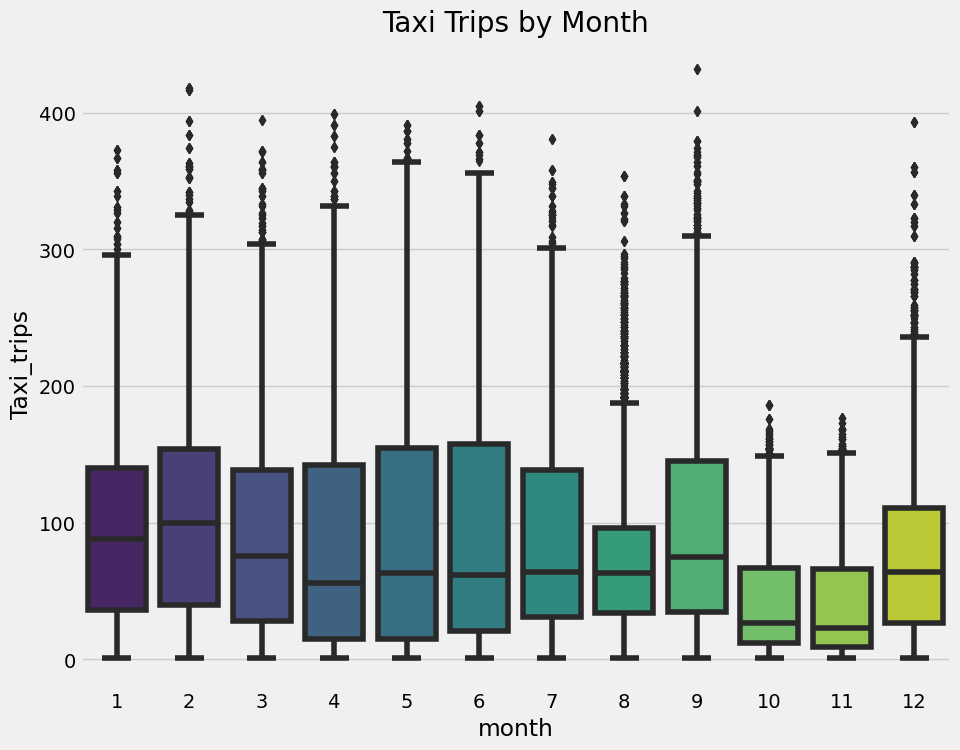

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_temp, x='month', y='Taxi_trips', palette='viridis')
ax.set_title('Taxi Trips by Month')
plt.show()

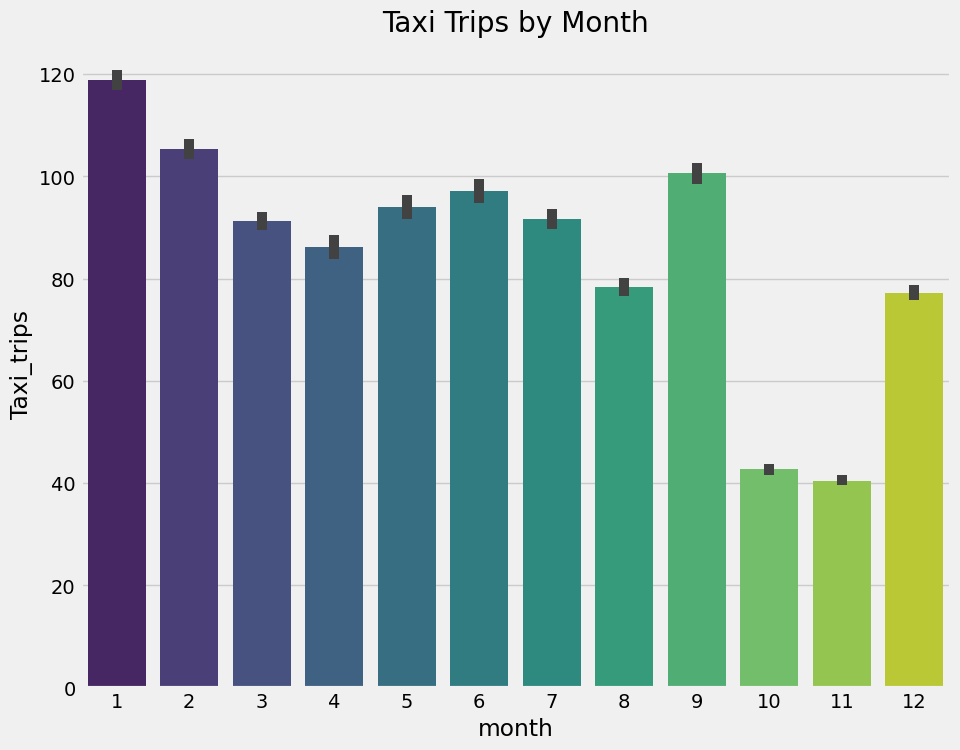

In [13]:
df_temp = df[df.index < '2023-01-01']
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df_temp, x='month', y='Taxi_trips', palette='viridis')
ax.set_title('Taxi Trips by Month')
plt.show()

Monthly graph shows that January has the most demand in a year, followed by February and September.


### Correlation

In [14]:
df.corr()

,Taxi_trips,Rideshare_trips,Arr Pax,Temp (°C),Rel Hum (%),Wind Spd (km/h),Freezing Drizzle,Rain,Smoke,Heavy Rain,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1_excel,lag2_excel,lag3_excel
Taxi_trips,1.000000,0.745100,0.291252,0.074433,-0.160634,0.041414,-0.004181,-0.009639,-0.033209,-0.007943,...,-0.033151,-0.224312,-0.208517,-0.334194,-0.210125,-0.022028,-0.213301,-0.375495,-0.375495,-0.375495
Rideshare_trips,0.745100,1.000000,0.333710,0.203648,-0.032647,-0.022823,-0.013795,-0.052695,0.057000,-0.009891,...,-0.026454,0.213833,0.207601,0.500945,0.206198,-0.005610,0.203355,0.616142,0.616142,0.616142
Arr Pax,0.291252,0.333710,1.000000,0.076830,-0.043258,0.020837,-0.002792,-0.014596,-0.020333,0.004665,...,-0.000049,0.029050,0.027918,-0.069221,0.027117,0.001866,0.021650,-0.061278,-0.061278,-0.061278
Temp (°C),0.074433,0.203648,0.076830,1.000000,-0.340408,0.068431,-0.017446,-0.121324,0.070748,0.002568,...,0.010361,0.178940,0.168185,-0.017904,0.166952,0.025044,0.157145,0.021636,0.021636,0.021636
Rel Hum (%),-0.160634,-0.032647,-0.043258,-0.340408,1.000000,-0.131227,0.012738,0.289821,0.012365,0.017647,...,0.024841,0.104253,0.093217,0.174656,0.092520,-0.023008,0.090884,0.192194,0.192194,0.192194
Wind Spd (km/h),0.041414,-0.022823,0.020837,0.068431,-0.131227,1.000000,0.006759,0.137491,-0.032607,0.015709,...,0.017728,-0.038466,-0.042381,0.012316,-0.043399,-0.013396,-0.037372,0.001876,0.001876,0.001876
Freezing Drizzle,-0.004181,-0.013795,-0.002792,-0.017446,0.012738,0.006759,1.000000,-0.003811,-0.000764,-0.000177,...,-0.000083,-0.013092,-0.015365,0.011982,-0.016143,-0.011363,-0.016386,0.007925,0.007925,0.007925
Rain,-0.009639,-0.052695,-0.014596,-0.121324,0.289821,0.137491,-0.003811,1.000000,-0.022315,-0.006321,...,-0.006515,0.002079,-0.001278,0.015755,-0.001141,-0.004956,-0.005932,0.015103,0.015103,0.015103
Smoke,-0.033209,0.057000,-0.020333,0.070748,0.012365,-0.032607,-0.000764,-0.022315,1.000000,-0.001266,...,-0.007190,0.044862,0.055800,0.013916,0.055392,-0.008124,0.055621,0.026527,0.026527,0.026527
Heavy Rain,-0.007943,-0.009891,0.004665,0.002568,0.017647,0.015709,-0.000177,-0.006321,-0.001266,1.000000,...,0.015787,0.014567,0.013870,0.000176,0.014176,0.004558,0.013630,0.003494,0.003494,0.003494


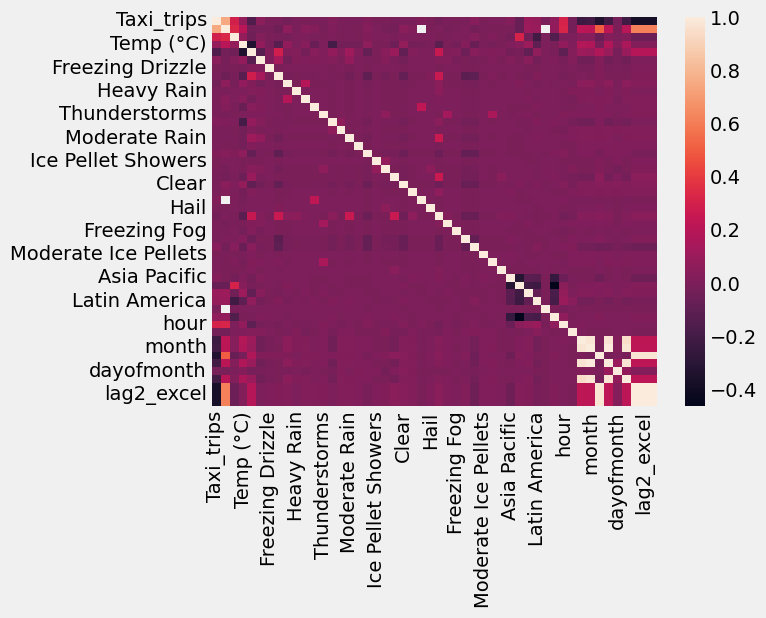

In [15]:
sns.heatmap(df.corr())
plt.show()

In [16]:
corr_matrix = df.corr()
corr_matrix['Taxi_trips'].sort_values()

lag3_excel              -0.375495
lag1_excel              -0.375495
lag2_excel              -0.375495
year                    -0.334194
quarter                 -0.224312
weekofyear              -0.213301
dayofyear               -0.210125
month                   -0.208517
Rel Hum (%)             -0.160634
Domestic                -0.073509
Smoke                   -0.033209
dayofweek               -0.033151
Fog                     -0.024611
dayofmonth              -0.022028
Drizzle                 -0.017861
Heavy Snow              -0.012068
Moderate Rain Showers   -0.011328
Thunderstorms           -0.009871
Rain                    -0.009639
Moderate Rain           -0.009333
Middle East             -0.008869
Ice Pellets             -0.008860
Moderate Snow           -0.008584
Heavy Rain              -0.007943
Clear                   -0.007545
Mostly Cloudy           -0.006847
Freezing Rain           -0.006802
Rain Showers            -0.005906
Hail                    -0.005533
Moderate Ice P

As expected, `Rideshare_trips` has the highest correlation coefficient with `Taxi_trips`. `hour` and `Arr Pax` show around 0.30 of correlation. It was unexpected that the correlation with the `Arr Pax` is not that significant. Most of the values show close to 0 correlation with `Taxi_trips`.